In [1]:
"""
Imports
"""
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.stats.api as sms

In [2]:
samples_to_use_list = list(range(1000, 10000, 1000))
samples_to_use_list = samples_to_use_list + list(range(10000, 110000, 10000))

In [3]:
def get_conf_interval(data):
    mean = np.mean(data)
    lower_ci = mean - sms.DescrStatsW(data).tconfint_mean()[0]
    return mean, lower_ci
def get_complexity(method):
    measurements = (len(method['times']))
    
    mean_result = []
    err_result = []
    
    for index, measurement in enumerate(samples_to_use_list[:measurements]):        
        mean, lower_ci = get_conf_interval(method['times'][index])
        mean_result.append(mean)
        err_result.append(lower_ci)
        
    return mean_result, err_result

In [4]:
dbscan = json.loads(open('ExecutionTime/Results/dbscan_extended.json').read())
w_dbscan = json.loads(open('ExecutionTime/Results/wdbscan_extended.json').read())
lof = json.loads(open('ExecutionTime/Results/lof_extended.json').read())
ods = json.loads(open('ExecutionTime/Results/ods_extended.json').read())

mean_dbscan, err_dbscan = get_complexity(dbscan)
mean_w_dbscan, err_w_dbscan = get_complexity(w_dbscan)
mean_lof, err_lof = get_complexity(lof)
mean_ods, err_ods = get_complexity(ods)

In [5]:
"""
LOAD MEMORY USAGE
"""

lens = list(range(0,19))
experiments = list(range(1,4))
methods = ['dbscan', 'wdbscan', 'lof', 'ods']

def read_measurement(mes_len, mes_experiment, mes_method):
    filename = 'MemoryUsage/Results/'+mes_method+'/'+mes_method+'_len_'+str(mes_len)+'_experiment_'+str(mes_experiment)+'.txt'
    return np.array([line.rstrip('\n') for line in open(filename)]).astype('int').max()

measurements = {}
for method in methods:
    measurements[method] = []
    for lens_ in lens:
        measurements[method].append([])
        
for experiment in experiments:
    for lens_ in lens:
        for method in methods:
            try:
                measurements[method][lens_].append(read_measurement(lens_, experiment, method))
            except:
                print('Impossible to open: {} | len: {}| experiment: {}'.format(method, lens_, experiment))  
                
def get_mean_conf_int(data):
    result = {}
    
    for method in methods:
        result[method] = []
        
        means = []
        errors = []
        
        for len_ in lens:
            means.append(np.mean(data[method][len_]))
            errors.append(0)
            
        result[method].append(means)
        result[method].append(errors)
    
    return result        

processed_measurements = get_mean_conf_int(measurements)

Impossible to open: dbscan | len: 16| experiment: 1
Impossible to open: dbscan | len: 17| experiment: 1
Impossible to open: dbscan | len: 18| experiment: 1
Impossible to open: dbscan | len: 11| experiment: 2
Impossible to open: wdbscan | len: 11| experiment: 2
Impossible to open: lof | len: 11| experiment: 2
Impossible to open: ods | len: 11| experiment: 2
Impossible to open: dbscan | len: 12| experiment: 2
Impossible to open: wdbscan | len: 12| experiment: 2
Impossible to open: lof | len: 12| experiment: 2
Impossible to open: ods | len: 12| experiment: 2
Impossible to open: dbscan | len: 13| experiment: 2
Impossible to open: wdbscan | len: 13| experiment: 2
Impossible to open: lof | len: 13| experiment: 2
Impossible to open: ods | len: 13| experiment: 2
Impossible to open: dbscan | len: 14| experiment: 2
Impossible to open: wdbscan | len: 14| experiment: 2
Impossible to open: lof | len: 14| experiment: 2
Impossible to open: ods | len: 14| experiment: 2
Impossible to open: dbscan | len

/home/andrian/anaconda3/envs/ods/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/andrian/anaconda3/envs/ods/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


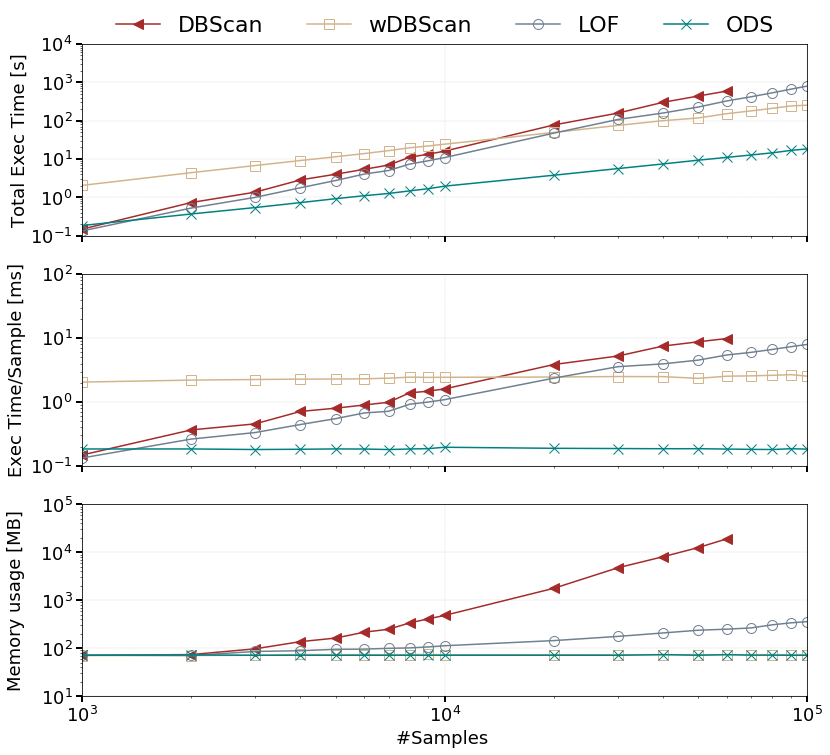

In [6]:
fontsizeLegend = 22
fontsizeLabel = 18
fontsizeticks = 18

ticks = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
lab = ['0', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M']

markersize = 10
markers = {
    'dbscan': '<',
    'wdbscan': 's',
    'lof': 'o',
    'ods': 'x'
}

colors = {
    'dbscan': 'brown',
    'wdbscan': 'tan',
    'lof': 'slategrey',
    'ods': 'teal'    
}

fig, ax = plt.subplots(3, sharex=True, figsize=(13,12))

"""
Total execution time
"""
ax[0].loglog(samples_to_use_list[:len(mean_dbscan)],
             mean_dbscan, label='DBScan',
             marker=markers['dbscan'],
             color=colors['dbscan'],
             markersize=markersize)
ax[0].loglog(samples_to_use_list[:len(mean_w_dbscan)],
             mean_w_dbscan, label = 'wDBScan',
             marker=markers['wdbscan'],
             color=colors['wdbscan'],
             markersize=markersize,
            markerfacecolor='none')
ax[0].loglog(samples_to_use_list[:len(mean_lof)],
             mean_lof, label='LOF',
             marker=markers['lof'],
             color=colors['lof'],
             markersize=markersize,
             markerfacecolor='none')
ax[0].loglog(samples_to_use_list[:len(mean_ods)],
             mean_ods, label='ODS',
             marker=markers['ods'],
             color=colors['ods'],
             markersize=markersize)
ax[0].set_ylabel('Total Exec Time [s]', fontsize=fontsizeLabel, labelpad=1)
ax[0].tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fontsizeticks)
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=5, fancybox=False, shadow=False, fontsize=fontsizeLegend, frameon=False)

"""
Execution time  per sample
"""
ax[1].loglog(samples_to_use_list[:len(mean_dbscan)],
             np.array(mean_dbscan)*1000/np.array(samples_to_use_list[:len(mean_dbscan)]),
             marker=markers['dbscan'],
             color=colors['dbscan'],
             markersize=markersize)
ax[1].loglog(samples_to_use_list[:len(mean_w_dbscan)],
             np.array(mean_w_dbscan)*1000/np.array(samples_to_use_list[:len(mean_w_dbscan)]),
             marker=markers['wdbscan'],
             color=colors['wdbscan'],
             markersize=markersize,
            markerfacecolor='none')
ax[1].loglog(samples_to_use_list[:len(mean_lof)],
             np.array(mean_lof)*1000/np.array(samples_to_use_list[:len(mean_lof)]),
             marker=markers['lof'],
             color=colors['lof'],
             markersize=markersize,
             markerfacecolor='none')
ax[1].loglog(samples_to_use_list[:len(mean_ods)],
             np.array(mean_ods)*1000/np.array(samples_to_use_list[:len(mean_ods)]),
             marker=markers['ods'],
             color=colors['ods'],
             markersize=markersize)
ax[1].set_ylabel('Exec Time/Sample [ms]', fontsize=fontsizeLabel)
ax[1].tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fontsizeticks)

"""
Memory usage
"""
ax[2].loglog(samples_to_use_list[:len(processed_measurements['dbscan'][0])][:15],
             np.array(processed_measurements['dbscan'][0][:15])/1000,
             marker=markers['dbscan'],
             color=colors['dbscan'],
             markersize=markersize)
ax[2].loglog(samples_to_use_list[:len(processed_measurements['wdbscan'][0])],
             np.array(processed_measurements['wdbscan'][0])/1000,
             marker=markers['wdbscan'],
             color=colors['wdbscan'],
             markersize=markersize,
            markerfacecolor='none')
ax[2].loglog(samples_to_use_list[:len(processed_measurements['lof'][0])],
             np.array(processed_measurements['lof'][0])/1000,
             marker=markers['lof'],
             color=colors['lof'],
             markersize=markersize,
             markerfacecolor='none')
ax[2].loglog(samples_to_use_list[:len(processed_measurements['ods'][0])],
             np.array(processed_measurements['ods'][0])/1000,
             marker=markers['ods'],
             color=colors['ods'],
             markersize=markersize)
ax[2].set_ylabel('Memory usage [MB]', fontsize=fontsizeLabel, labelpad=15)
ax[2].tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fontsizeticks)

ax[2].set_xlabel('#Samples ', fontsize=fontsizeLabel)


ax[0].grid(linestyle='-.', linewidth=0.15, color='k')
ax[0].set_ylim(1e-1,1e4)
ax[0].set_xlim(samples_to_use_list[0], samples_to_use_list[-1])

ax[1].grid(linestyle='-.', linewidth=0.15, color='k')
ax[1].set_ylim(1e-1,1e2)

ax[2].grid(linestyle='-.', linewidth=0.15, color='k')
ax[2].set_ylim(1e1,1e5)

fig.savefig('execution_time_memory_comparison.pdf', bbox_inches='tight')

In [8]:
samples_to_use_list[14]

60000

In [9]:
mean_dbscan[14]

590.5232385993004

In [10]:
mean_w_dbscan[14]

152.04861932992935

In [11]:
mean_lof[14]

326.5103378891945

In [17]:
1/0.00018

5555.555555555556